<a href="https://colab.research.google.com/github/TEJASWI0G/Cat-and-Dog-image-classifier/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.5MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(54,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation ='sigmoid'))


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 54)      15606     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 54)      216       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 105ms/step - loss: 0.5677 - accuracy: 0.7041 - val_loss: 0.5434 - val_accuracy: 0.7272
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4421 - accuracy: 0.7917 - val_loss: 0.5431 - val_accuracy: 0.7416
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3476 - accuracy: 0.8465 - val_loss: 0.4961 - val_accuracy: 0.7792
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2773 - accuracy: 0.8831 - val_loss: 0.4533 - val_accuracy: 0.8146
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1472 - accuracy: 0.9438 - val_loss: 0.5656 - val_accuracy: 0.8104
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0787 - accuracy: 0.9715 - val_loss: 0.8781 - val_accuracy: 0.7720
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0594 - accuracy: 0.9798 - val_loss: 0.6805 - val_ac

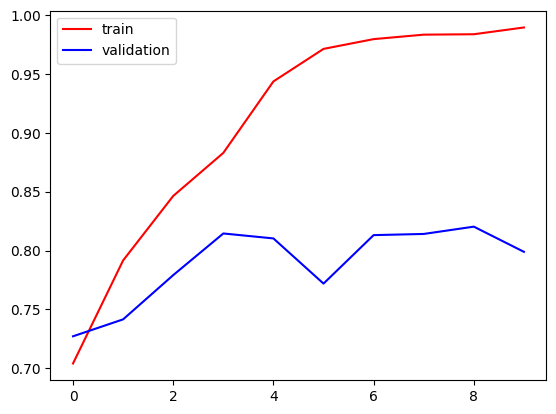

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='validation')
plt.legend()
plt.show()

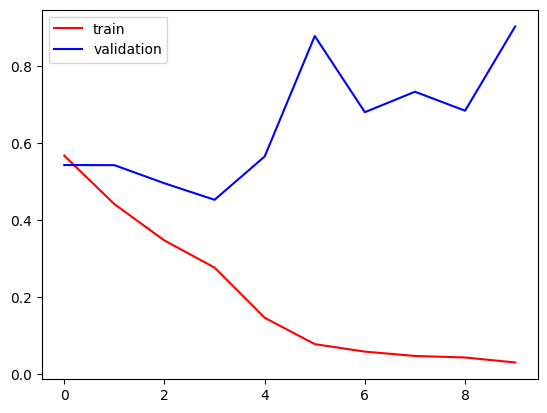

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color ='blue',label ='validation')
plt.legend()
plt.show()

In [24]:
# ways to reduce overfitting

# Add more date
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [33]:
import cv2

In [34]:
test_img = cv2.imread('/content/dog.jpg')

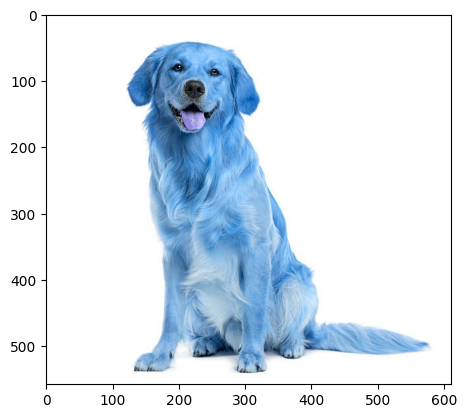

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(558, 612, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)


1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [44]:
test_img1 = cv2.imread('/content/cat.jpg')

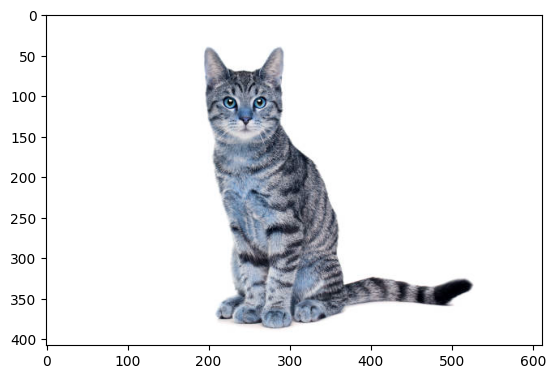

In [45]:
plt.imshow(test_img1)

In [46]:
test_img1.shape

(408, 612, 3)

In [47]:
test_img1 = cv2.resize(test_img1,(256,256))

In [48]:
test_input1 = test_img1.reshape((1,256,256,3))

In [49]:
model.predict(test_input1)


1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)